# Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
# ANSWER
# **Fundamental idea:**
Ensemble techniques combine multiple base (weak) models to produce a stronger overall model. The goal is to reduce variance, bias, or both, and improve generalization performance compared to any single model.

# **Bagging (Bootstrap Aggregating):**

**Approach:** Trains multiple models independently on different random subsets of data (sampled with replacement).

** Objective: ** Reduces variance and helps prevent overfitting.

** Example:**  Random Forest.

** Aggregation:**  Averages predictions (for regression) or uses majority vote (for classification).

# Boosting:

** Approach:**  Trains models sequentially, where each new model focuses on correcting errors made by previous ones.

** Objective:** Reduces bias and builds a strong learner from weak learners.

** Example:** AdaBoost, Gradient Boosting, XGBoost.

** Aggregation: ** Weighted sum of weak learners.

 # Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
# answer
A single decision tree can overfit because it models every detail of the training data.
**Random Forest mitigates this by:**
>>Averaging predictions from many decorrelated trees.
>>Randomizing feature selection and data sampling, reducing variance.

# Two key hyperparameters:
** n_estimators:** Number of trees. More trees → more stable, less variance.
**max_features: ** Number of features considered for splitting. Limiting this introduces diversity among trees and prevents overfitting.

# Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
# answer
**Stacking:** Combines predictions from multiple different base models using a meta-model (or blender) that learns to best combine their outputs.
# **Difference:**
**Bagging/Boosting:** Use homogeneous models (same algorithm) and simple combination (voting/weighting).
**Stacking:** Uses heterogeneous models and a learning model to combine them.
# Example use case:
Combine Logistic Regression, Decision Tree, and SVM as base learners → feed their outputs into a meta-model (e.g., Random Forest) for final prediction. Often used in Kaggle competitions.


# Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
# ANSWER
**OOB (Out-of-Bag) Score**:
Each tree is trained on a bootstrap sample (~63% of data). The remaining 37% (not sampled) is out-of-bag and used to test that tree’s performance.

**Usefulness:**
It provides a built-in, unbiased estimate of model accuracy without needing a separate validation set, saving data and time.


# Question 5: Compare AdaBoost and Gradient Boosting in terms of: ● How they handle errors from weak learners ● Weight adjustment mechanism  ● Typical use cases
# ANSWER
                         # AdaBoost

 1. Increases weights of misclassified samples
 2. Explicitly updates sample weights
 3. Simple binary classification, fewer trees
                        # Gradient Boosting

 1. Fits next model to residual errors from prior model
 2. Implicitly updates model via gradient of loss function
 3. Complex regression/classification, high accuracy tasks                                               

# Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
# ANSWER
CatBoost automatically handles categorical variables using target-based statistics:

Converts categorical values into numerical representations using ordered target encoding (mean target value per category, computed in a way that avoids data leakage).

Uses Permutation-driven encoding to preserve unbiasedness.
This avoids the need for one-hot encoding and reduces dimensionality, improving performance on categorical-heavy datasets.


# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
# ANSWER


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load dataset
data = load_wine()
X, y = data.data, data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. KNN without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Unscaled Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4. With StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV for best K and metric
params = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
best_knn = grid.best_estimator_

# 6. Evaluate optimized model
y_pred_opt = best_knn.predict(X_test_scaled)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_opt))


Unscaled Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Scaled Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Params: {'metric': 'manhattan', 'n_neighbors': 1}
Optimized Accuracy: 0.9629629629629629


# Question 8 : PCA + KNN with Variance Analysis and Visualization
# ANSWER

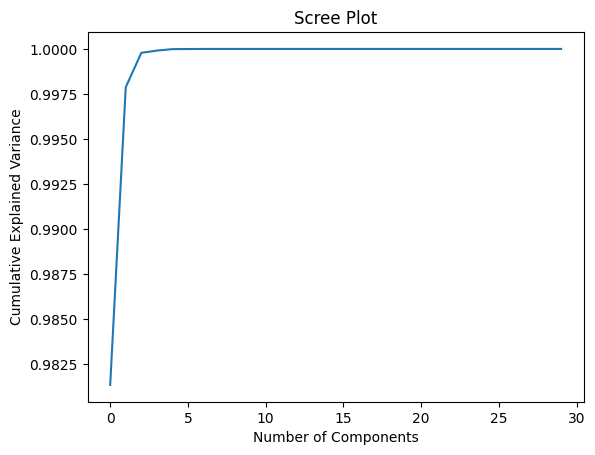

Original Accuracy: 0.959
PCA (95%) Accuracy: 0.947


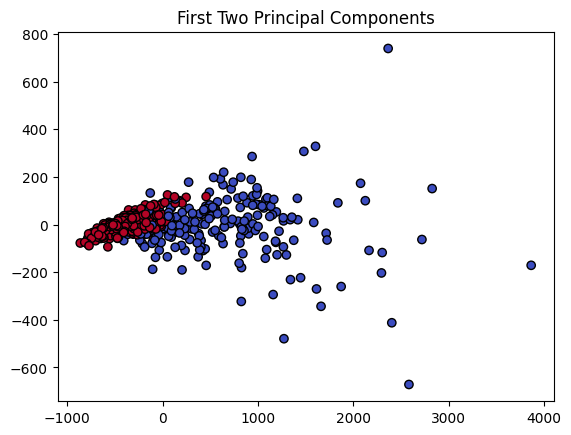

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Retain 95% variance
pca_95 = PCA(0.95)
X_train_pca = pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)

# Train KNN on original and PCA data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc_orig = accuracy_score(y_test, knn.predict(X_test))

knn.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn.predict(X_test_pca))

print(f"Original Accuracy: {acc_orig:.3f}")
print(f"PCA (95%) Accuracy: {acc_pca:.3f}")

# Visualization
pca2 = PCA(2)
X_pca2 = pca2.fit_transform(X)
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("First Two Principal Components")
plt.show()


# Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
# ANSWER


K=1, MSE=8430.42
K=5, MSE=4803.91
K=10, MSE=5041.11
K=20, MSE=5712.02
K=50, MSE=8251.37


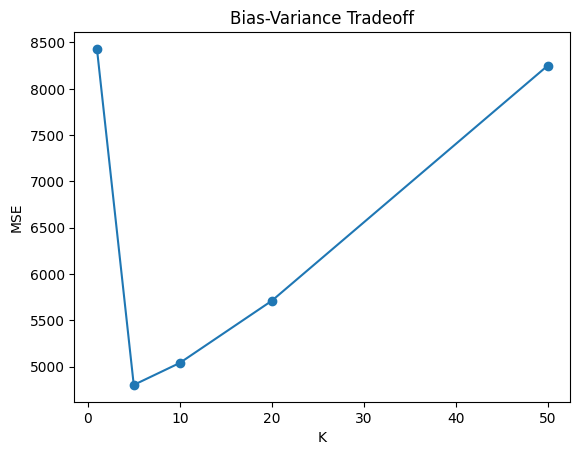

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mse_vals = []
for k in [1, 5, 10, 20, 50]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_vals.append(mse)
    print(f"K={k}, MSE={mse:.2f}")

plt.plot([1, 5, 10, 20, 50], mse_vals, marker='o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff')
plt.show()


# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
# ANSWER



{'brute': (0.7012987012987013, 0.0008261203765869141), 'kd_tree': (0.7012987012987013, 0.0011360645294189453), 'ball_tree': (0.7012987012987013, 0.0013701915740966797)}


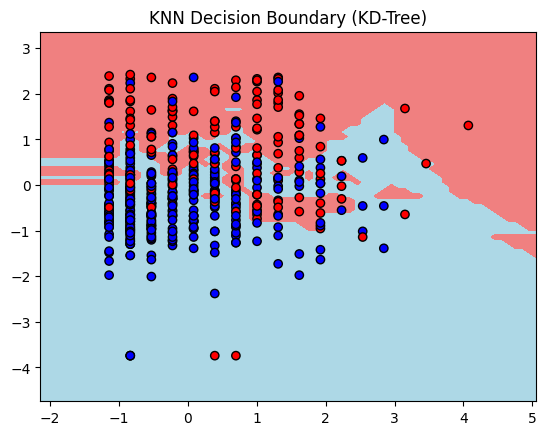

In [6]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import requests

# Download the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
filename = "pima-indians-diabetes.csv"
response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)

# Load dataset
data = pd.read_csv(filename, header=None) # Load without header
data.rename(columns={8: 'Outcome'}, inplace=True) # Rename the last column to 'Outcome'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Imputation
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in methods:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train, y_train)
    duration = time.time() - start
    acc = accuracy_score(y_test, knn.predict(X_test))
    results[algo] = (acc, duration)

print(results)

# Visualization (decision boundary using top 2 features)
import numpy as np
from matplotlib.colors import ListedColormap

X_2 = X_train[:, :2]
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_best.fit(X_2, y_train)

x_min, x_max = X_2[:, 0].min()-1, X_2[:, 0].max()+1
y_min, y_max = X_2[:, 1].min()-1, X_2[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightcoral')))
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.title("KNN Decision Boundary (KD-Tree)")
plt.show()